## Homework #2 - Statistical Analysis. Pandas. Numpy

### Overview:
Numpy is a powerful library that takes almost all computing tasks
needed for Machine Learning, from vector and matrix operations to optimization problems.
Usually, all formulas in every algorithm are implemented in NumPy or using another library named scipy.
In this homework, we invite you to write some python functions using NumPy to
practice more the maths to NumPy conversion, which will be helpful to
you in the Research and Development projects

### Tasks:
#### Formula Nr. 1: Normal Distribution

The normal distribution function is the function that allows us to get the
probability of getting a value from a numerical series knowing the mean
and standard deviation of the series.

$$
\begin{split}
N(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}, \\
x\text{ - the value for which the probability is calculated} \\
\mu\text{ - the mean of the distribution} \\
\sigma\text{ - the standard deviation of the distribution } \\
\end{split}
$$
Implement in python using NumPy the formula above as a function
which will take the following parameters:
$$
\begin{split}
x\text{: a float value} \\
\mu\text{: a float value (represents the mean of the series)} \\
\sigma\text{: a float value (represents the standard deviation of the series)} \\
\end{split}
$$


In [152]:
import numpy as np
import matplotlib.pyplot as plt

def normal_distribution(x: float, mu: float, sigma: float) -> float:
    """
    Normal Distribution Function

    Args:
        x (float): the value whose probability is to be found.
        mu (float): the mean value of the series.
        sigma (float): the standard deviation of the series.

    Returns:
        float: the value of the Normal Distribution Function at x.
    """
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp((-0.5) * ((x - mu) / sigma) ** 2)

In [153]:
x = 0
mu = 0
sigma = 1
y = normal_distribution(x, mu, sigma)
print(f"CUSTOM NORMAL DISTRIBUTION FUNCTION: {y}")

from scipy.stats import norm
print(f"SCIPY NORMAL DISTRIBUTION FUNCTION: {norm.pdf(x, loc=mu, scale=sigma)}")


CUSTOM NORMAL DISTRIBUTION FUNCTION: 0.3989422804014327
SCIPY NORMAL DISTRIBUTION FUNCTION: 0.3989422804014327


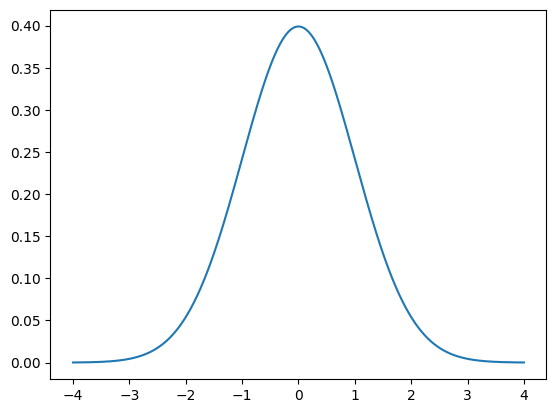

In [154]:
x = np.linspace(start=-4, stop=4, num=10000)
mu = 0
sigma = 1
y = normal_distribution(x, mu, sigma)
plt.plot(x, y)

#### Formula Nr. 2: Sigmoid Function

The name of the organization comes from an activation function - Sigmoid. The sigmoid function is used when you need
to convert real numbers into probabilities or from a -∞ to +∞ range into a 0 to 1 range. Its
formula is the following:

$$
\begin{split}
S(x) = \frac{1}{1+e^{-x}}, \\
x\text{ - the value that should be transformed} \\
e\text{ - the value of Euler's number} \\
\end{split}
$$
Implement in python using NumPy the formula above as a function
which will take the following parameters:
$$
\begin{split}
x\text{:  a real numeric value} \\
\end{split}
$$

In [155]:
def sigmoid_function(x: float) -> float:
    """
    Sigmoid Function

    Args:
        x (float): the value that should be scaled to range -1 to 1.

    Returns:
        float : the value of the Sigmoid Function at x, that ∈ [-1, 1].
    """
    return 1 / (1 + np.exp(-x))

In [156]:
x = 0
y = sigmoid_function(x)
print(f"CUSTOM SIGMOID FUNCTION: {y}")

from scipy.special import expit
print(f"SCIPY SIGMOID FUNCTION: {expit(x)}")


CUSTOM SIGMOID FUNCTION: 0.5
SCIPY SIGMOID FUNCTION: 0.5


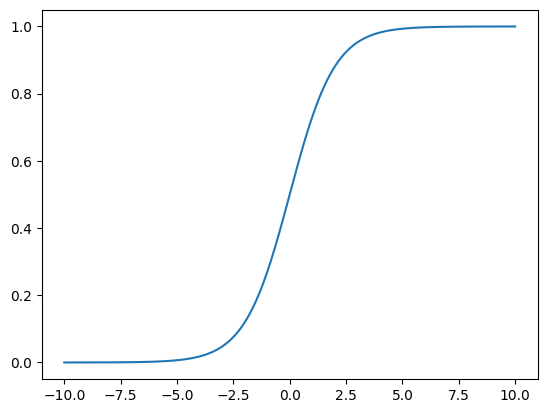

In [157]:
x = np.linspace(start=-10, stop=10, num=10000)
y = sigmoid_function(x)
plt.plot(x, y)

#### Formula Nr. 3:  Weights update in Logistic Regression

One of the Machine Learning algorithms you will learn during this book
is Logistic Regression. It uses an iterative process to find the coefficients
of a linear function, updating the values of the weights vector ($w$) at each
iteration, taking into account errors of the model’s prediction itself

$$
\begin{split}
w_j = w_j - \alpha\frac{1}{n}\displaystyle\sum_{i=1}^{n} {(\hat{y}_i - y_i)x^{(i)}_j}, \\
w_j\text{ - is the weight with the index $j$ in the weight vector} \\
y_i\text{ - is the value with the index $i$ in the target vector} \\
x^{(i)}_j\text{is the value of the matrix in the cell with the row index $i$ and the column index $j$} \\
n\text{ - is the number of rows in the matrix $X$ and vector $\vec{y}$} \\
\alpha\text{ - is the learning rate} \\
\end{split}
$$
Implement in python using NumPy the formula above as a function
which will take the following parameters:
$$
\begin{split}
\vec{w}\text{(weight vector): a 1-d numpy array.} \\
X\text{(matrix of samples): a 2-d numpy array.} \\
\vec{y}\text{(target value vector): a 1-d numpy array.} \\
\hat{y}\text{ (predicted target vector): a 1-d numpy array.} \\
α\text{(learning rate): a value from 0 to 1, default - 0.0005} \\
\end{split}
$$

In [158]:
def weight_update_logistic_regression(w: np.ndarray, X: np.ndarray, y: np.ndarray, y_hat: np.ndarray, alpha: float = 5e-4) -> np.ndarray:
    """
    Weight Update function for Logistic Regression

    Args:
        w (1-D np.ndarray): the weight vector.
        X (2-D np.ndarray): the feature matrix.
        y (1-D np.ndarray): the target vector.
        y_hat (1-D np.ndarray): the predicted target vector.
        alpha (float): the learning rate (default: 5e-4).

    Returns:
        np.ndarray : the updated weight vector (1D).
    """
    # (y_hat - y) = err, vector 1D
    # np.dot((y_hat - y), X) = dj_dw per each w, vector 1D
    # (alpha / X.shape[0]) * np.dot((y_hat - y), X) = vector 1D, multiplication with a scalar
    # w - (alpha / X.shape[0]) * np.dot((y_hat - y), X) = vector 1D = vector subtraction W - alpha/m * (y_res dot_prod X), for each previous w_j subtract dj_dw
    return w - (alpha / X.shape[0]) * np.dot((y_hat - y), X)

In [159]:
def weight_update_logistic_regression_iters(w: np.ndarray, X: np.ndarray, y: np.ndarray, y_hat: np.ndarray, alpha: float = 5e-4) -> np.ndarray:
    """
    Weight Update function for Logistic Regression without using Numpy Vectorization

    Args:
        w (1-D np.ndarray): the weight vector.
        X (2-D np.ndarray): the feature matrix.
        y (1-D np.ndarray): the target vector.
        y_hat (1-D np.ndarray): the predicted target vector.
        alpha (float): the learning rate (default: 5e-4).

    Returns:
        np.ndarray : the updated weight vector (1D).
    """
    m, n = X.shape
    w_res = np.zeros(n)
    for j in range(n):
        print(f"j = {j}")

        # dj_dw = np.dot((y_hat - y), X[:, j])

        dj_dw = 0
        for i in range(m):
            dj_dw += (y_hat[i] - y[i]) * X[i, j]

        print(f"dj_dw = {dj_dw}")
        print(f"w[j]- alpha/n * dj_dw = {w[j] - (alpha / m) * dj_dw}")
        w_res[j] = w[j] - (alpha / m) * dj_dw

        print(f"w_res[j] = {w_res[j]}")
    print(w_res)
    return w_res


In [160]:
X_train = np.array([[1, 2], [3, 4], [2, 1]])
y_train = np.array([0, 1, 0])
w_tmp  = np.zeros_like(X_train[0])
alpha = 0.1
y_hat = np.array([0, 0, 1])

print("w before update: ", w_tmp)
w = weight_update_logistic_regression(w_tmp, X_train, y_train, y_hat, alpha)
w2 = weight_update_logistic_regression_iters(w_tmp, X_train, y_train, y_hat, alpha)
print("w after update: ", w)
print("w after update: ", w2)

w before update:  [0 0]
j = 0
dj_dw = -1
w[j]- alpha/n * dj_dw = 0.03333333333333333
w_res[j] = 0.03333333333333333
j = 1
dj_dw = -3
w[j]- alpha/n * dj_dw = 0.1
w_res[j] = 0.1
[0.03333333 0.1       ]
w after update:  [0.03333333 0.1       ]
w after update:  [0.03333333 0.1       ]


#### Formula Nr. 4:  Mean Squared Error

Mean Squared Error(MSE) measures the average of the squares of the
errors—that is, the average squared difference between the estimated values and
the actual value. They are usually used in Regression problems.


$$
\begin{split}
MSE = \frac{1}{n}\displaystyle\sum_{i=1}^{n} {(y_i - \hat{y}_i)^2}, \\
y_i\text{ - is the value with the index $i$ in the target vector} \\
\hat{y}_i\text{ - is the value with the index $i$ in the predicted vector} \\
n\text{ - is the number of rows in the vector $\vec{y}$} \\
\end{split}
$$
Why square the difference between the true value and the predicted
one? Because the errors can be positive and also negative, and as you
might guess, they can cancel one another, which is not good.
You might ask why not use the absolute value to not cancel values?
Well there is a bit complicated answer for which you have to understand
the concept of gradient descent, so we will leave it for your research.
(because squared error function is differentiable everywhere, it means it is continuous everywhere,
while the absolute error function is not continuous at 0, therefore not differentiable everywhere)

In the formula above, $y$ represents the predictions vector, for example, predictions from some ML algorithm, and $\hat{y}_i$ represents the actual
target values, which we try to predict. $\sum{}{}$ sign means just a summation
operation, where $i = 1$ represents the initial value of the index and $n$
represents the length of the vector. For every $i$ till $n$, you have to calculate the squared difference for the predicted and target value for row $i$,
sum all this together, and then calculate its mean by dividing by $n$.

Implement in python using NumPy the formula above as a function
which will take the following parameters:
$$
\begin{split}
\vec{y}\text{ (target): a 1-d numpy array.} \\
\hat{y}\text{ (predictions): a 1-d numpy array.} \\
\end{split}
$$
The function should return the error

In [161]:
def mean_squared_error(y: np.ndarray, y_hat: np.ndarray) -> float:
    """
    Mean Squared Error

    Args:
        y (1-D np.ndarray): the target vector.
        y_hat (1-D np.ndarray): the predicted target vector.

    Returns:
        float : the mean squared error value between predicted and true values.
    """
    return np.mean((y - y_hat) ** 2)

In [162]:
def mean_squared_error_iters(y: np.ndarray, y_hat: np.ndarray) -> float:
    """
    Mean Squared Error without Numpy Vectorization

    Args:
        y (1-D np.ndarray): the target vector.
        y_hat (1-D np.ndarray): the predicted target vector.

    Returns:
        float : the mean squared error value between predicted and true values.
    """
    cost = 0
    m = y.shape[0]
    for i in range(m):
        cost += (y[i] - y_hat[i]) ** 2
    return cost / m

In [163]:
y = np.array([1, 2, 1 ,2, 1, 5])
y_hat = np.array([3, 5, 2, 1, 1, 4])
print("MSE: ", mean_squared_error(y, y_hat))
print("MSE (CUSTOM FUNCTION): ", mean_squared_error_iters(y, y_hat))

MSE:  2.6666666666666665
MSE (CUSTOM FUNCTION):  2.6666666666666665


#### Formula Nr. 5:  Binary Cross Entropy

This is another error function that is used in Classification problems,
the $y$ parameter from the function below represents the actual value of
the class and $\hat{y}$ the predicted one. You might observe that always half
of the function is canceled, which part depends on the actual class. If
$y = 0$, the first half is canceled, and the $(1 − y)$ will be $1$, which saves
the second part, for $y = 1$ the opposite. The log is taken out of the
predicted value, and as the value approaches the actual value, this log
error will be smaller and smaller, showing ML algorithms the way to the
best parameters.



$$
\begin{split}
LOSS = -\frac{1}{output\_size}\displaystyle\sum_{i=1}^{output\_size} {y_i\cdot\log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)}, \\
y_i\text{ - is the value with the index $i$ in the target vector} \\
\hat{y}_i\text{ - is the value with the index $i$ in the predicted vector} \\
n\text{ - is the number of rows in the vector $\vec{y}$} \\
\end{split}
$$
In the formula above, $y$ represents the predictions vector, for example, predictions from some ML algorithm, and $\hat{y}$ represents the actual
target values, which we try to predict. $\sum{}{}$ sign represents just a summation operation, where $i = 1$ represents the initial value of the
index and output size represents the length of the vector, for every $i$ till
output size you have to calculate the error for predicted and target value
for row $i$, sum all this together and then calculate its mean by dividing
by output size

Implement in python using NumPy the formula above as a function
which will take the following parameters:
$$
\begin{split}
\vec{y}\text{ (target): a 1-d numpy array.} \\
\hat{y}\text{ (predictions): a 1-d numpy array.} \\
\end{split}
$$
The function should return the error

In [164]:
def binary_cross_entropy(y: np.ndarray, y_hat: np.ndarray) -> float:
    """
    Binary Cross Entropy

    Args:
        y (1-D np.ndarray): the target vector.
        y_hat (1-D np.ndarray): the predicted target vector.

    Returns:
        float : the mean squared error value between predicted and true values.
    """
    # y * ln(y_hat) = vector
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

In [165]:
def binary_cross_entropy_iters(y: np.ndarray, y_hat: np.ndarray) -> float:
    """
    Binary Cross Entropy without Numpy Vectorization

    Args:
        y (1-D np.ndarray): the target vector.
        y_hat (1-D np.ndarray): the predicted target vector.

    Returns:
        float : the mean squared error value between predicted and true values.
    """
    m = y.shape[0]
    cost = 0
    for i in range(m):
        cost += y[i] * np.log(y_hat[i]) + (1 - y[i]) * np.log(1 - y_hat[i])
    return - cost / m

In [166]:
y = np.array([1, 0])
y_hat = np.array([.8, .1])
print("BCE: ", binary_cross_entropy(y, y_hat))
print("BCE (CUSTOM FUNCTION): ", binary_cross_entropy_iters(y, y_hat))

BCE:  0.164252033486018
BCE (CUSTOM FUNCTION):  0.164252033486018
